Atreish Ramlakhan, Aishwarya Singh, Nosson Weissman <br>
Professor James Topor <br>
AIM 5001 <br>
April 4, 2021 

__AIM 5001 Project 3 : Data Preparation & Feature Engineering__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skp

# Part 1 : Data Loading

We create a list of attribute names in order, then load the cars data set from csv into pandas.

In [2]:
attributes =  ('symboling','normalized_losses',
    'make','fuel_type','aspiration',
    'num_of_doors','body_style',
    'drive_wheels','engine_location',
    'wheel_base','length',
    'width','height',
    'curb_weight','engine_type',
    'num_of_cylinders','engine_size',
    'fuel_system','bore','stroke',
    'compression_ratio','horsepower',
    'peak_rpm','city_mpg',
    'highway_mpg','price')

CarInfo = pd.read_csv('https://raw.githubusercontent.com/codepharmer/AIM-5001/main/Module_10/M10_Data.csv', names = attributes)

CarInfo.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
CarInfo.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [4]:
CarInfo.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

Missing values in this data set are represented initially by '?' characters.
We find out how many missing values, if any, each attribute has.

In [5]:
print('Missing Vals:\n')
for attr in CarInfo: 
    c = CarInfo[CarInfo[attr] == '?']
    if not c.empty:
        print(attr, ': ', len(c))

Missing Vals:

normalized_losses :  41
num_of_doors :  2
bore :  4
stroke :  4
horsepower :  2
peak_rpm :  2
price :  4


We replace the question marks with pandas NaN characters to represent missing values, 
then convert the numeric attributes that had been mischaracterized into appropriate data types.

In [6]:
CarInfo.replace('?', np.NaN, inplace = True)

numerics = ('normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price')

for i in numerics:
    CarInfo[i] = pd.to_numeric(CarInfo[i])


The 'symboling' attribute is a categorical ordinal attribute which pandas had misidentified as numeric.
We convert this into an object type before proceeding.

In [7]:
CarInfo.symboling = CarInfo.symboling.astype(object)

CarInfo.dtypes

symboling             object
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

# Part 2 : Exploratory Data Analysis

## Numeric Attributes

In [8]:
CarInfo.describe()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We select 8 numeric attributes of interest to discuss: normalized losses, curb weight, wheelbase, engine size, horsepower, city and highway MPG, and price.

### Normalized Losses
Normalized losses is an actuarial statistic representing the relative average loss payment per insured vehicle year.

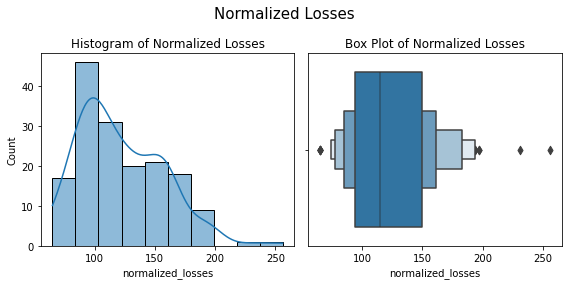

In [9]:
plt.figure(figsize = (8,4))
plt.suptitle('Normalized Losses', size = 15)

plt.subplot(1,2,1)
plt.title('Histogram of Normalized Losses')
sns.histplot(x = CarInfo.normalized_losses, kde = True)
plt.subplot(1,2,2)
plt.title('Box Plot of Normalized Losses')
sns.boxenplot(x = CarInfo.normalized_losses)

plt.tight_layout()

We see that the normalized losses attribute has a significantly skewed distribution.
Thus we can see that using a mean or median value to fill in the missing values for this attribute would be problematic.

### Car Size Attributes
Curb weight and wheelbase are selected as two dimensions representing the size of cars in our data set.

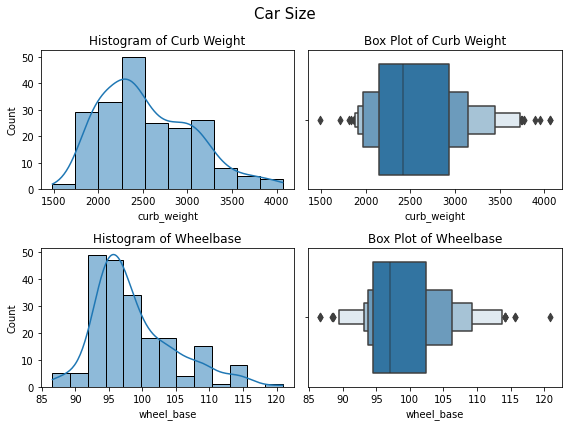

In [10]:
plt.figure(figsize = (8,6))
plt.suptitle('Car Size', size = 15)

plt.subplot(2,2,1)
plt.title('Histogram of Curb Weight')
sns.histplot(x = CarInfo.curb_weight, kde = True)
plt.subplot(2,2,2)
plt.title('Box Plot of Curb Weight')
sns.boxenplot(x = CarInfo.curb_weight)

plt.subplot(2,2,3)
plt.title('Histogram of Wheelbase')
sns.histplot(x = CarInfo.wheel_base, kde = True)
plt.subplot(2,2,4)
plt.title('Box Plot of Wheelbase')
sns.boxenplot(x = CarInfo.wheel_base)

plt.tight_layout()

We see that the distributions of both variables are skewed, but have different shapes.
Curb weight has a broader interquartile range, while wheelbase has more significant tails.

### Engine Size & Horsepower
Attributes pertaining to the engines of the cars in our data set.

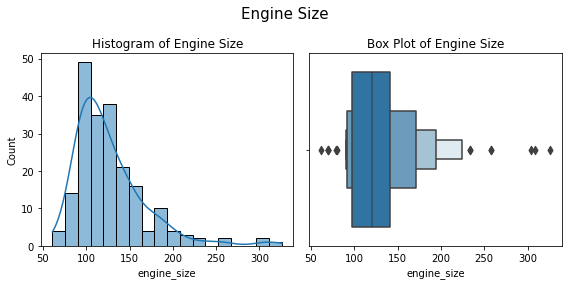

In [11]:
plt.figure(figsize = (8,4))
plt.suptitle('Engine Size', size = 15)

plt.subplot(1,2,1)
plt.title('Histogram of Engine Size')
sns.histplot(x = CarInfo.engine_size, kde = True)
plt.subplot(1,2,2)
plt.title('Box Plot of Engine Size')
sns.boxenplot(x = CarInfo.engine_size)

plt.tight_layout()

Similar to our car size attributes, the engine size attribute displays a skew with a long right tail representing 
a small number of large vehicles in our data set.

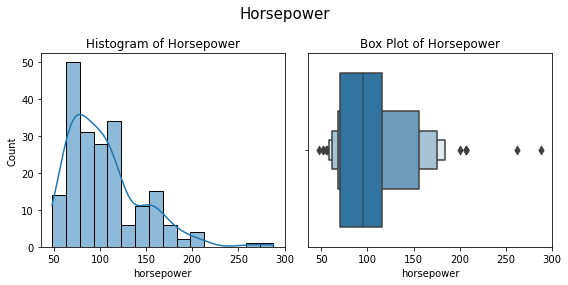

In [12]:
plt.figure(figsize = (8,4))
plt.suptitle('Horsepower', size = 15)

plt.subplot(1,2,1)
plt.title('Histogram of Horsepower')
sns.histplot(x = CarInfo.horsepower, kde = True)
plt.subplot(1,2,2)
plt.title('Box Plot of Horsepower')
sns.boxenplot(x = CarInfo.horsepower)

plt.tight_layout()

The horsepower attribute is again skewed, but has a distinct plateau around 150 hp.

### Mileage
Attributes defining how far a car travels on a mile of gas, in city conditions and on the highway.

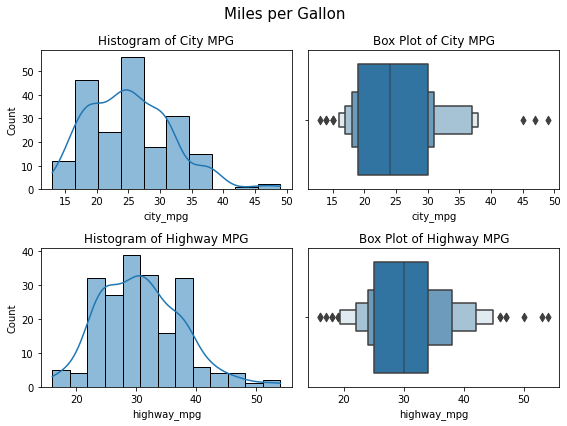

In [13]:
plt.figure(figsize = (8,6))
plt.suptitle('Miles per Gallon', size = 15)

plt.subplot(2,2,1)
plt.title('Histogram of City MPG')
sns.histplot(x = CarInfo.city_mpg, kde = True)
plt.subplot(2,2,2)
plt.title('Box Plot of City MPG')
sns.boxenplot(x = CarInfo.city_mpg)

plt.subplot(2,2,3)
plt.title('Histogram of Highway MPG')
sns.histplot(x = CarInfo.highway_mpg, kde = True)
plt.subplot(2,2,4)
plt.title('Box Plot of Highway MPG')
sns.boxenplot(x = CarInfo.highway_mpg)

plt.tight_layout()

Our miles-per-gallon attributes both have broad interquartile ranges and fairly narrow tails. Aside from small numbers of outliers to the right, these variables do not have a strong directional skew.

### Price

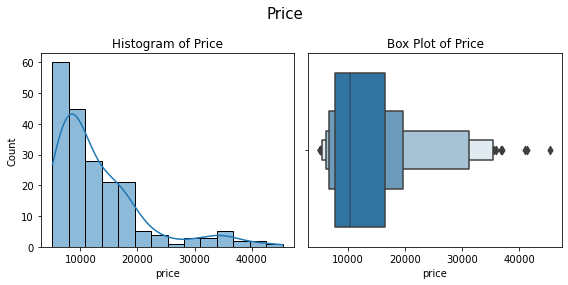

In [14]:
plt.figure(figsize = (8,4))
plt.suptitle('Price', size = 15)

plt.subplot(1,2,1)
plt.title('Histogram of Price')
sns.histplot(x = CarInfo.price, kde = True)
plt.subplot(1,2,2)
plt.title('Box Plot of Price')
sns.boxenplot(x = CarInfo.price)

plt.tight_layout()

The price attribute once again displays significant skew, implying a large number of 
cheap cars in our data set mixed with a smaller of number of significantly more expensive machines.

### Other Numeric Attributes

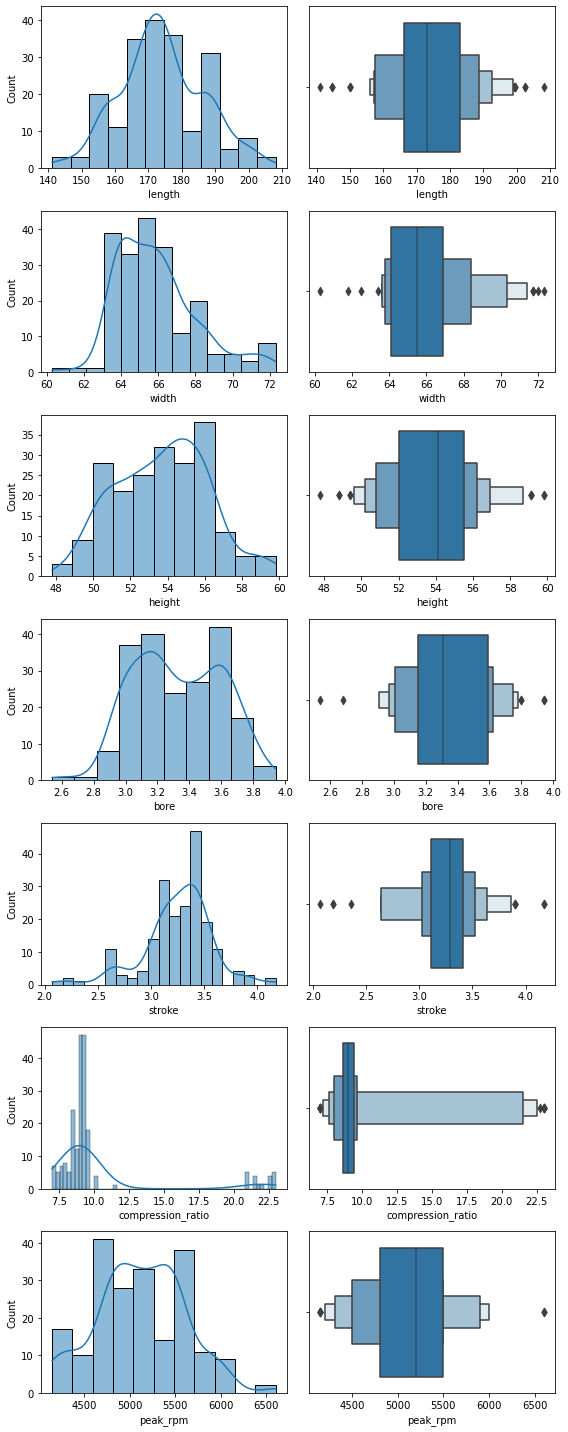

In [15]:
plt.figure(figsize = (8,20))

plt.subplot(7,2,1)
sns.histplot(x = CarInfo.length, kde = True)
plt.subplot(7,2,2)
sns.boxenplot(x = CarInfo.length)

plt.subplot(7,2,3)
sns.histplot(x = CarInfo.width, kde = True)
plt.subplot(7,2,4)
sns.boxenplot(x = CarInfo.width)

plt.subplot(7,2,5)
sns.histplot(x = CarInfo.height, kde = True)
plt.subplot(7,2,6)
sns.boxenplot(x = CarInfo.height)

plt.subplot(7,2,7)
sns.histplot(x = CarInfo.bore, kde = True)
plt.subplot(7,2,8)
sns.boxenplot(x = CarInfo.bore)

plt.subplot(7,2,9)
sns.histplot(x = CarInfo.stroke, kde = True)
plt.subplot(7,2,10)
sns.boxenplot(x = CarInfo.stroke)

plt.subplot(7,2,11)
sns.histplot(x = CarInfo.compression_ratio, kde = True)
plt.subplot(7,2,12)
sns.boxenplot(x = CarInfo.compression_ratio)

plt.subplot(7,2,13)
sns.histplot(x = CarInfo.peak_rpm, kde = True)
plt.subplot(7,2,14)
sns.boxenplot(x = CarInfo.peak_rpm)

plt.tight_layout()

### Correlation Matrix

In [16]:
CarCorr = CarInfo.corr()

CarCorr

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
normalized_losses,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel_base,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,0.023220,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,0.105073,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.432335,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb_weight,0.119893,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine_size,0.167365,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.036167,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,0.065627,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310
compression_ratio,-0.132654,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005203,0.186170,1.000000,-0.205874,-0.436221,0.324701,0.265201,0.071107


Our correlation matrix is fairly large and hard to read, so we convert it into a triangular Seaborn heatmap.

<AxesSubplot:>

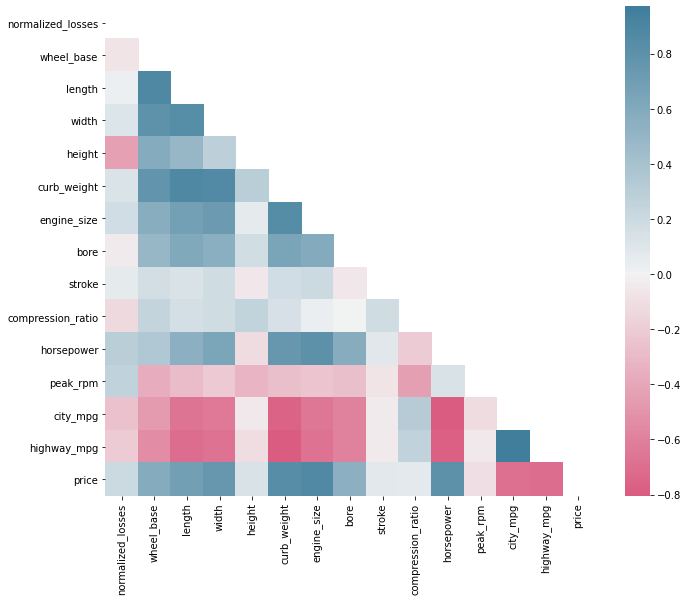

In [17]:
# Upper triangular mask
mask = np.triu(np.ones_like(CarCorr, dtype = bool))

fig, axes = plt.subplots(figsize=(11, 9))

# Diverging colormap
cmap = sns.diverging_palette(0, 230, as_cmap = True)

# Heatmap with mask and colormap applied
sns.heatmap(CarCorr, mask = mask, cmap = cmap, center = 0, square = True)

We see that our physical dimensions, wheelbase and curb weight attributes are positively correlated to each other, which 
is not surprising. Notably we see that city and highway mileage are positively correlated with each other, but negatively 
correlated with horsepower, weight and price. We can hypothesize a narrative of more expensive cars being larger, heavier and 
having more powerful engines which get worse mileage.

## Categorical Attributes

### Car Counts by Manufacturer

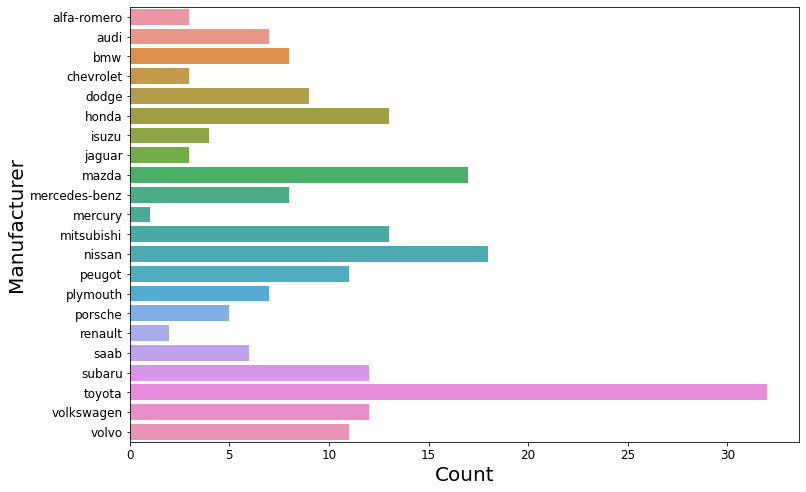

In [18]:
plt.figure(figsize = (12,8))
sns.countplot(y = 'make', data = CarInfo)
plt.xlabel('Count', size = 20)
plt.ylabel('Manufacturer', size = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

### Car Counts by Chassis Attributes
Body style, number of doors, engine placement, and driven wheels.

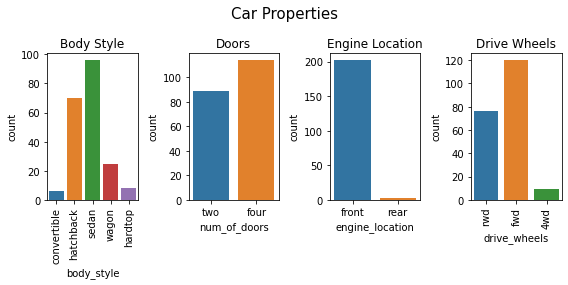

In [19]:
plt.figure(figsize = (8,4))
plt.suptitle('Car Properties', size = 15)

plt.subplot(1,4,1)
plt.title('Body Style')
sns.countplot(x = 'body_style', data = CarInfo)
plt.xticks(rotation = 90)

plt.subplot(1,4,2)
plt.title('Doors')
sns.countplot(x = 'num_of_doors', data = CarInfo)

plt.subplot(1,4,3)
plt.title('Engine Location')
sns.countplot(x = 'engine_location', data = CarInfo)

plt.subplot(1,4,4)
plt.title('Drive Wheels')
sns.countplot(x = 'drive_wheels', data = CarInfo)
plt.xticks(rotation = 90)

plt.tight_layout()

### Car Counts by Engine Attributes
Cylinder counts, aspiration (air intake) type, and fuel type. Some technical categorizations (camshaft types and fuel systems) are omitted for brevity.

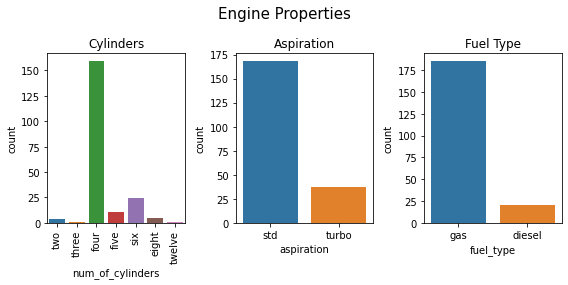

In [20]:
plt.figure(figsize = (8,4))
plt.suptitle('Engine Properties', size = 15)

plt.subplot(1,3,1)
plt.title('Cylinders')
sns.countplot(x = 'num_of_cylinders', data = CarInfo, order = ('two','three','four','five','six','eight','twelve'))
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
plt.title('Aspiration')
sns.countplot(x = 'aspiration', data = CarInfo)

plt.subplot(1,3,3)
plt.title('Fuel Type')
sns.countplot(x = 'fuel_type', data = CarInfo)

plt.tight_layout()

# Part 3 : Feature Engineering

## Question 1

Most of the numeric variables in our data set require some kind of feature scaling for use in a machine learning algorithm. Broadly we can divide our numeric attributes into two groups: right-skewed and unskewed.

The right-skewed variables evident from our earlier EDA work are: <br>
_normalized_losses <br>
wheel_base <br>
curb_weight <br>
engine_size <br>
horsepower <br>
price_

These variables require either normalization, or a Box-Cox Transform followed by possible standardization, assuming our algorithm is dependent on Gaussian assumptions. The scales of these attributes are also very different, so using this data as-is may result in performance losses.

The (relatively) unskewed attributes are: <br>
_length, width, height<br>
bore, stroke<br>
peak_rpm<br>
city_mpg, highway_mpg_

The degree to which these unskewed variables actually approximate a Gaussian form varies significantly however, with some (_bore_, _peak_rpm_) being nearly bimodal while others (_stroke_) are closer to normal. As a result, a Box-Cox Transform applied to the entire data set may be useful for these attributes as well. Once again, these variables' scales differ heavily, so the use of standardization may be warranted.

All of our numeric attributes in both groups are strictly positive, so no translation needs to be done prior to applying a Box-Cox Transform.

Finally, there is one attribute which displays significant outliers: _compression_ratio_. There are enough outlying data points in a cluster to the far right that the outliers are likely valid, and represent diesel engines and/or turbo engines or some other actually relevant automotive detail. If our research question / model is not concerned with engine technical details however we can simply opt to leave this attribute out.

## Question 2

As we saw during Part 1 : Data Loading, the number of missing values for each attribute are as follows:
<pre>
Missing Vals:

normalized_losses :  40
<strong>num_of_doors :  2</strong>
bore :  4
stroke :  4
horsepower :  2
peak_rpm :  2
<strong>price :  4</strong>
</pre>

Here, _num_of_doors_ is a categorical ordinal value while _price_ is numeric. We cannot use a mean, median or mode value to fill in missing values for price without altering the (highly skewed as we saw in EDA) distribution of the data. The most thorough approach to filling in these values would be to conduct a multivariate linear regression to project _price_ values and a logistic regression to project _num_of_doors_. However, since the number of values missing is very small, we can simply try to infer these values by analyzing the datapoints in question and comparing them manually to their peers.

In [21]:
null_doors = CarInfo[CarInfo.num_of_doors.isnull()]
null_price = CarInfo[CarInfo.price.isnull()]

In [22]:
null_doors

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


We see both cars with missing _num_of_doors_ values are front-engined fwd sedans. Domain knowledge tells us sedans are generally four-doored cars. We inspect further by looking at other such vehicles.

In [23]:
fwdsedans = CarInfo[(CarInfo.body_style == 'sedan') & (CarInfo.drive_wheels == 'fwd') & (CarInfo.engine_location == 'front')]

len(fwdsedans)

57

57 such vehicles are found (including the 2 with missing values). We now further condition based on manufacturer.

In [24]:
fwdsedans[fwdsedans.make == 'dodge']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0


In [25]:
fwdsedans[fwdsedans.make == 'mazda']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


We can see that our cars with missing values are a turbocharged variant of a Dodge sedan known to have four doors, and a diesel variant of a Mazda sedan known to have four doors. We thus enter the missing categorical values.

In [26]:
CarInfo2 = CarInfo

CarInfo2.num_of_doors.fillna('four', inplace = True)

Now we inspect the 4 cars which have missing _price_ values.

In [27]:
null_price

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


We check if there are comparable cars in our data set for these entries.

In [28]:
for i in range(len(null_price)):
    comparables = CarInfo[(CarInfo.make == null_price.iloc[i,].make) & (CarInfo.body_style == null_price.iloc[i,].body_style) & (CarInfo.num_of_cylinders == null_price.iloc[i,].num_of_cylinders)]
    print('Comparable Cars:', len(comparables))

Comparable Cars: 1
Comparable Cars: 3
Comparable Cars: 3
Comparable Cars: 1


As there are insufficient comparable cars, we loosen our comparison criterion to just include manufacturer.

In [29]:
for i in range(len(null_price)):
    comparables = CarInfo[(CarInfo.make == null_price.iloc[i,].make)]
    print('Comparable Cars:', len(comparables))

Comparable Cars: 7
Comparable Cars: 4
Comparable Cars: 4
Comparable Cars: 5


In [30]:
print('All Cars:', CarInfo.price.median())
print('Audi:', CarInfo[CarInfo.make == 'audi'].price.median())
print('Isuzu:', CarInfo[CarInfo.make == 'isuzu'].price.median())
print('Porsche:', CarInfo[CarInfo.make == 'porsche'].price.median())

All Cars: 10295.0
Audi: 17580.0
Isuzu: 8916.5
Porsche: 33278.0


We see that there is significant median price variation when conditioning by manufacturer. Thus we use the manufacturer-specific median prices as stand-ins for our missing values.

In [31]:
CarInfo2.price = CarInfo2.groupby(['make']).price.transform(lambda x: x.fillna(x.median()))

We make sure that the data set was transformed correctly.

In [32]:
CarInfo2.loc[129].price

33278.0

In [33]:
len(CarInfo2[CarInfo2.num_of_doors.isnull()])

0

In [34]:
len(CarInfo2[CarInfo2.price.isnull()])

0

Finally, we compare the resulting price distribution to the one seen in our original EDA.

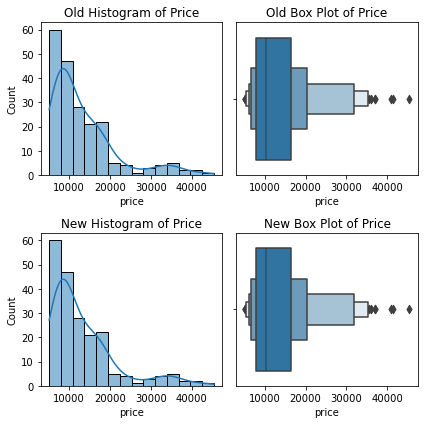

In [35]:
plt.figure(figsize = (6,6))

plt.subplot(2,2,1)
plt.title('Old Histogram of Price')
sns.histplot(x = CarInfo.price, kde = True)
plt.subplot(2,2,2)
plt.title('Old Box Plot of Price')
sns.boxenplot(x = CarInfo.price)

plt.subplot(2,2,3)
plt.title('New Histogram of Price')
sns.histplot(x = CarInfo2.price, kde = True)
plt.subplot(2,2,4)
plt.title('New Box Plot of Price')
sns.boxenplot(x = CarInfo2.price)

plt.tight_layout()

Thus we see that the change to the price distribution's shape is imperceptible.

## Question 3

The initial boxplots and histograms for _engine_size_ and _stroke_ are as seen in our EDA:

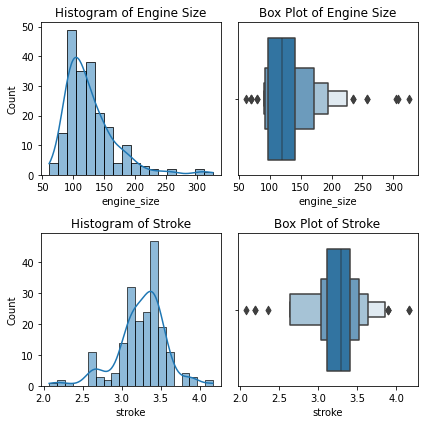

In [36]:
plt.figure(figsize = (6,6))

plt.subplot(2,2,1)
plt.title('Histogram of Engine Size')
sns.histplot(x = CarInfo.engine_size, kde = True)
plt.subplot(2,2,2)
plt.title('Box Plot of Engine Size')
sns.boxenplot(x = CarInfo.engine_size)

plt.subplot(2,2,3)
plt.title('Histogram of Stroke')
sns.histplot(x = CarInfo.stroke, kde = True)
plt.subplot(2,2,4)
plt.title('Box Plot of Stroke')
sns.boxenplot(x = CarInfo.stroke)

plt.tight_layout()

As mentioned in Question 1, _engine_size_ is a right-skewed variable while _stroke_ is relatively unskewed. In order to make our data more Gaussian, we apply a Box-Cox Transform to the entire numeric component of our data set:

In [37]:
numerics = ['normalized_losses','wheel_base','length',
    'width','height',
    'curb_weight',
    'engine_size',
    'bore','stroke',
    'compression_ratio','horsepower',
    'peak_rpm',
    'city_mpg','highway_mpg',
    'price']

CarInfo3 = CarInfo[numerics]

CarInfo3 = skp.power_transform(CarInfo3, method = 'box-cox')

The scikit-learn Box-Cox Transform generates a numpy array which we convert back into a pandas dataframe.

In [38]:
type(CarInfo3)

numpy.ndarray

In [39]:
np.shape(CarInfo3)

(205, 15)

In [40]:
CarInfo3 = pd.DataFrame(CarInfo3, columns = numerics)

CarInfo3.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,-2.403020,-0.404364,-1.15564,-2.067648,0.144825,0.380116,0.521155,-1.716468,-0.011717,0.461111,-0.250310,-0.585903,-0.487064,0.468055
1,NaN,-2.403020,-0.404364,-1.15564,-2.067648,0.144825,0.380116,0.521155,-1.716468,-0.011717,0.461111,-0.250310,-0.585903,-0.487064,0.826506
2,NaN,-0.699775,-0.205728,-1.15564,-0.533347,0.647094,0.890038,-2.431948,0.663547,-0.011717,1.278866,-0.250310,-0.976694,-0.652136,0.826506
3,1.179875,0.365053,0.233457,-0.57782,0.249523,-0.303496,-0.294328,-0.504463,0.414798,0.635359,0.222674,0.788042,-0.064805,-0.020144,0.530349
4,1.179875,0.296326,0.233457,-0.57782,0.249523,0.648777,0.535227,-0.504463,0.414798,-1.031703,0.557422,0.788042,-1.187887,-1.369271,0.918497


Immediately we can see that the data has been shifted, as all our attributes were strictly positive prior to the transform but now negative values exist.

We proceed to create new histograms and box plots of our transformed data.

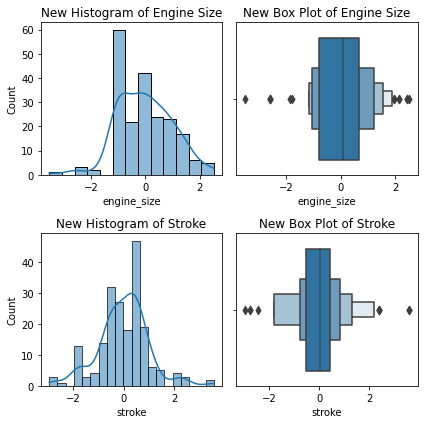

In [41]:
plt.figure(figsize = (6,6))

plt.subplot(2,2,1)
plt.title('New Histogram of Engine Size')
sns.histplot(x = CarInfo3.engine_size, kde = True)
plt.subplot(2,2,2)
plt.title('New Box Plot of Engine Size')
sns.boxenplot(x = CarInfo3.engine_size)

plt.subplot(2,2,3)
plt.title('New Histogram of Stroke')
sns.histplot(x = CarInfo3.stroke, kde = True)
plt.subplot(2,2,4)
plt.title('New Box Plot of Stroke')
sns.boxenplot(x = CarInfo3.stroke)

plt.tight_layout()

We see that our previously skewed variable (_engine_size_) has been shifted significantly, turning its leftmost values into deliberate outliers to warp the distribution into a somewhat Gaussian form. The unskewed variable _stroke_ however, maintains essentially the same distribution shape as before.

Also of note is that the data has been rescaled, and the variables which were previously on very different scales are now on a similar one. We check to see if standardization has been achieved.

In [42]:
print('Mean of Engine Size:', CarInfo3.engine_size.mean())
print('Standard Deviation of Engine Size:', CarInfo3.engine_size.std())
print('Mean of Stroke:', CarInfo3.stroke.mean())
print('Standard Deviation of Stroke:', CarInfo3.stroke.std())

Mean of Engine Size: 4.469974526023734e-14
Standard Deviation of Engine Size: 1.0024479840791305
Mean of Stroke: -5.382648445259776e-16
Standard Deviation of Stroke: 1.0024968827881706


Both variables have a mean of (effectively) 0 and standard deviation of 1. Thus we see that the scikit-learn Box-Cox Transform has not only reshaped the data into approximately Gaussian form, but also standardized it.

## Question 4

#### Part A
* **symboling** : Categorical Ordinal <br>
_symboling_ is described as having a ranking order in its possible values, with 3 being the most risky and -3 the least. <br><br>

* **make** : Categorical Nominal <br>
_make_ is a nominal value, as the manufacturers are not ranked in any way. <br><br>

* **engine_type** : Categorical Nominal <br>
_engine_type_ is another nominal value, as none of the camshaft configurations are described as being better or worse than any others.

#### Part B
The 3 variables here are all categorical, so all of them would need to be converted into dummy variables for use in a machine learning model (even the ordinal one). This can be done easily using pandas' get_dummies() function.

#### Part C

In [43]:
symboling = pd.get_dummies(CarInfo.symboling, prefix = 'sym')

symboling.head()

,sym_-2,sym_-1,sym_0,sym_1,sym_2,sym_3
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [44]:
make = pd.get_dummies(CarInfo.make, prefix = 'make')

make.head()

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
engine_type = pd.get_dummies(CarInfo.engine_type, prefix = 'etype')

engine_type.head()

,etype_dohc,etype_dohcv,etype_l,etype_ohc,etype_ohcf,etype_ohcv,etype_rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


## Question 5

We are now seeking to reduce some of our features that have strictly numeric data. To do this we will have to apply a dimension reduction technique, in this case Principal Component Analysis, which is appropriate for numeric data. First we obtain a dataframe for all the required numeric data that we wish to reduce dimensionality.

In [46]:
numerics2 = ['wheel_base','length','width','height','curb_weight','engine_size',
             'compression_ratio','horsepower','peak_rpm','city_mpg']

CarInfo5 = CarInfo[numerics2]
CarInfo5

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg
0,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,5000.0,21
1,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,5000.0,21
2,94.5,171.2,65.5,52.4,2823,152,9.0,154.0,5000.0,19
3,99.8,176.6,66.2,54.3,2337,109,10.0,102.0,5500.0,24
4,99.4,176.6,66.4,54.3,2824,136,8.0,115.0,5500.0,18
...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,9.5,114.0,5400.0,23
201,109.1,188.8,68.8,55.5,3049,141,8.7,160.0,5300.0,19
202,109.1,188.8,68.9,55.5,3012,173,8.8,134.0,5500.0,18
203,109.1,188.8,68.9,55.5,3217,145,23.0,106.0,4800.0,26


Notice that there are NaN values. Let us determine how many we have on our current data set.

In [47]:
CarInfo5.isna().sum()

wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
dtype: int64

With the preceding result we have to decide what to do with the NaN values for each feature.

In [48]:
null_horsepower = CarInfo5[CarInfo.horsepower.isnull()]
null_peak_rpm = CarInfo5[CarInfo.peak_rpm.isnull()]

In [49]:
null_horsepower

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg
130,96.1,181.5,66.5,55.2,2579,132,8.7,NaN,NaN,23
131,96.1,176.8,66.6,50.5,2460,132,8.7,NaN,NaN,23


Notice that we have the same 2 instances of the car 130 and 131 for missing values of _horsepower_ and for _peak_rpm_. So we can determine what those values are by looking at similar cars and fill them.

Let us look for comparable attributes for the missing _horsepower_ and _peak_rpm_ missing values. Since we determined that _make_ was the best to use for Question 2, we will use _make_.

In [50]:
# Since it is the same 2 rows we will use one query
null_horsepower2 = CarInfo[CarInfo.horsepower.isnull()]
null_horsepower2

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [51]:
CarInfo[CarInfo.make == 'renault']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


Interesting to note that make is not a good feature to groupby because they are the only two instances in our entire data frame. Let us now look at _engine_size_ = 132.

In [52]:
CarInfo[CarInfo.engine_size == 132]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


Since we are getting the same 130 and 131 as isolated cases for multiple attributes both numeric and categorical. The best course of action before we apply PCA, is to remove entirely from dataset.

In [53]:
CarInfo6 = CarInfo5.drop(labels=[130, 131], axis = 0)

CarInfo6.head()

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg
0,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,5000.0,21
1,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,5000.0,21
2,94.5,171.2,65.5,52.4,2823,152,9.0,154.0,5000.0,19
3,99.8,176.6,66.2,54.3,2337,109,10.0,102.0,5500.0,24
4,99.4,176.6,66.4,54.3,2824,136,8.0,115.0,5500.0,18


In [54]:
CarInfo6.isna().sum()

wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
dtype: int64

In [55]:
CarInfo6.shape

(203, 10)

Now we can begin our process of Principal Component Analysis

Since the range of our values is quite large from feature to feature, we must first standardize all of our data so that we can have optimal output from our model.

In [56]:
x = CarInfo6.loc[:, numerics2].values
x = skp.StandardScaler().fit_transform(x)

Now we have a matrix of values that is mean = 0 and variance = 1 for each feature. Notice there are negative values when none existed prior, this is because the data is now approximately standard normal.

In [57]:
x

array([[-1.68846721, -0.4208036 , -0.83808333, ...,  0.17022842,
        -0.26219556, -0.64709448],
       [-1.68846721, -0.4208036 , -0.83808333, ...,  0.17022842,
        -0.26219556, -0.64709448],
       [-0.71015113, -0.22654975, -0.18677547, ...,  1.25563669,
        -0.26219556, -0.95222847],
       ...,
       [ 1.71076665,  1.19797849,  1.39497216, ...,  0.75079564,
         0.78349598, -1.10479546],
       [ 1.71076665,  1.19797849,  1.39497216, ...,  0.04401816,
        -0.68047218,  0.11574048],
       [ 1.71076665,  1.19797849,  1.39497216, ...,  0.24595458,
         0.57435767, -0.95222847]])

In [58]:
x.shape # The same shape of our DataFrame in use.

(203, 10)

In [59]:
x.dtype

dtype('float64')

Now that we have a standardized "matrix" we will find it's covariance and the preceeding Eigenvectors and Eigenvalues, which are intrigal to PCA. Note that the Eigenvectors are in fact the principal components.

In [60]:
covariance_matrix = np.cov(x.T)
covariance_matrix

array([[ 1.0049505 ,  0.88248576,  0.80152406,  0.5944315 ,  0.78074681,
         0.57327893,  0.24983214,  0.35404096, -0.36283915, -0.4749598 ],
       [ 0.88248576,  1.0049505 ,  0.84533757,  0.49620529,  0.88312636,
         0.68699444,  0.16096179,  0.5577503 , -0.28874734, -0.67390856],
       [ 0.80152406,  0.84533757,  1.0049505 ,  0.28347466,  0.87202303,
         0.73909453,  0.18330852,  0.64566284, -0.22104631, -0.64553145],
       [ 0.5944315 ,  0.49620529,  0.28347466,  1.0049505 ,  0.29727181,
         0.06827564,  0.26274587, -0.1112588 , -0.32386722, -0.05037861],
       [ 0.78074681,  0.88312636,  0.87202303,  0.29727181,  1.0049505 ,
         0.85502756,  0.15197335,  0.75475227, -0.26762468, -0.76189823],
       [ 0.57327893,  0.68699444,  0.73909453,  0.06827564,  0.85502756,
         1.0049505 ,  0.02957819,  0.81478628, -0.2458285 , -0.65690404],
       [ 0.24983214,  0.16096179,  0.18330852,  0.26274587,  0.15197335,
         0.02957819,  1.0049505 , -0.20689332

In [61]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n\n", eigen_vectors,"\n")
print("Eigenvalues: \n\n", eigen_values, "\n")

Eigenvector: 

 [[-0.36003156  0.24504604  0.23646693  0.04769425 -0.38088719 -0.2752946
   0.35567787  0.16267402  0.38122272  0.48267571]
 [-0.39799196  0.10747845  0.17644219  0.03594234 -0.1847366   0.14148872
   0.2996542   0.09572111 -0.79148478 -0.13445108]
 [-0.39123735  0.02666037 -0.04805978  0.19857745 -0.39739661 -0.2263982
  -0.73457161  0.04361362  0.01739632 -0.2312993 ]
 [-0.15643036  0.43107841  0.61961315 -0.04575068  0.58207983 -0.03111793
  -0.23257258  0.02235965  0.05939645 -0.07605405]
 [-0.41538236 -0.0152025  -0.09103859  0.03566025  0.06905035  0.12244927
   0.13122734 -0.86912993  0.14825883 -0.05759154]
 [-0.36589019 -0.13079477 -0.32741543 -0.14769669  0.34406622 -0.478021
   0.29227711  0.26281058  0.13904116 -0.44641744]
 [-0.04856304  0.50171359 -0.45033227  0.62382493  0.17310067  0.29279398
   0.06887276  0.16566682  0.07794289  0.00349157]
 [-0.3202009  -0.37913323 -0.18614204  0.06679881  0.40810707 -0.02185586
  -0.23451289  0.09495547 -0.21759558  

The following code will allow us to see the "weight" of the energy of the eigenvalues in relation to the variance it explains. They are listed in descending order.

In [62]:
var = []

for i in eigen_values:
     var.append((i/sum(eigen_values))*100)

print(var)

[54.689453578633895, 21.545660584478007, 9.192721607165748, 5.835129166835626, 3.053113426487982, 2.2850683652257344, 1.33776369499986, 0.5070963381386253, 0.8085696065062418, 0.7454236315282983]


We can easily see that the first 4 eigenvalues explain over 90% of the variance of our data. So we can easily use 4 components instead of 10, which is a significant reduction.

In [63]:
cumvar = np.cumsum(var)
print(cumvar)

[ 54.68945358  76.23511416  85.42783577  91.26296494  94.31607836
  96.60114673  97.93891042  98.44600676  99.25457637 100.        ]


Let us now re-do the above with the scikit-learn PCA method.

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(x)

PCA(n_components=4)

Now we have a matrix that is comprised of 4 components that explains over 90% of the variance of our data, from the numeric features that were chosen for Question 5.

In [65]:
x_pca = pca.transform(x)
x_pca.shape

(203, 4)